### Introduction  

In this project, I will implement a neural network to classify handwritten digits using the MNIST dataset. The MNIST dataset comprises 28x28 grayscale images of handwritten digits ranging from 0 to 9. This project is a fundamental exercise in deep learning and image recognition, offering a solid understanding of how to handle image-based datasets. As a widely recognized benchmark problem, it serves as an ideal starting point for beginners in machine learning and neural networks.  

### Objective  

The primary goal of this project is to build a neural network capable of classifying handwritten digits into their respective classes. The system will be trained on labeled image data, enabling it to learn patterns associated with each digit. Ultimately, I aim to develop a predictive system that can correctly identify the digit in any new handwritten image provided as input.  

### Approach  

The project begins with data collection and preprocessing. Since the MNIST dataset is readily available in the Keras library, accessing it is straightforward. Preprocessing will include normalizing pixel values to a range of 0 to 1 and standardizing image dimensions. Labels for the images will be converted into one-hot encoded vectors.  

Next, I will construct a neural network comprising fully connected layers. The architecture will include:  
1. An **input layer** to accept the flattened image data.  
2. **Hidden layers** with activation functions to capture non-linear patterns.  
3. A final **output layer** with softmax activation for classifying digits.  

The model will be trained using the training dataset, optimized with the Adam optimizer, and evaluated on a separate test dataset. Key metrics, such as accuracy, will assess the model's performance.  

Finally, I will develop a predictive system. This system will take a new handwritten digit image as input and predict the corresponding digit. By completing this project, I aim to demonstrate the practical applications of neural networks in image recognition tasks and establish a robust foundation for tackling more complex deep learning challenges in the future.

step by Step Approch

1)importing the dataset

2)image processing

3)splitting the data into train_test spilt

4)building the neural network

5)training the neural network

6)giving new image to trained data

7)prediction is done on new image given to trained neural network.

**IMPORTING THE NECESSARY LIBRARIES AND DEPENDENCIES**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix

**IMPORTING THE DATASET WHICH IS IN KERAS**

In [110]:
from keras.datasets import mnist

so here in this dataset dta is already split into train test data so we just have to load it(for refrence you can visit keras mnist dataset on google)

Where

 Training data have 60,000 Images

& Test data has 10,000 Images

Image dimension = 28 x 28

Grayscale Image = 1 channel

In [111]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [112]:
type(X_train)

numpy.ndarray

In [113]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [114]:
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [115]:
print(X_train[10].shape)

(28, 28)


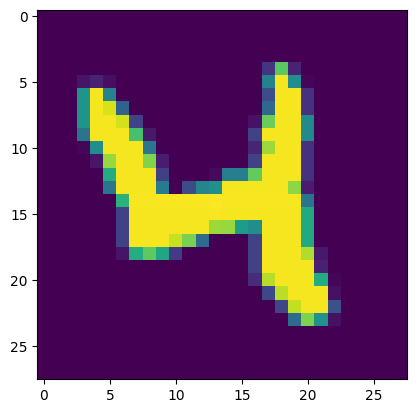

4


In [116]:
#DISPLAYING THE IMAGE

plt.imshow(X_train[20])
plt.show()


print(Y_train[20])

In [117]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [118]:
#PRINTING UNIQUE VALUES INi Y_train
print(np.unique(Y_train))

#PRINTING UNIQUE VALUES IN Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [119]:
#SCALING THE VALUES
X_train = X_train/255
X_test = X_test/255

In [120]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**BUILDING NEURAL NETWORK**

In [121]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**NOW COMPLILING THE NN**

In [122]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**NOW TRAINING THE NN**

In [123]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8425 - loss: 0.5183
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9560 - loss: 0.1468
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9672 - loss: 0.1062
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0824
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9803 - loss: 0.0652
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9829 - loss: 0.0560
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0477
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0415
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0398
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9876 - loss: 0.0360
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9896 - loss: 0.0289
Epoch 12/20
1875/1875 ━━━━━━━━

accuracy: 99.40

**NOR FOR ACCURACY ON TEST DATA**

In [124]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9663 - loss: 0.1840
0.9700999855995178


Accuracy :97.00

In [125]:
print(X_test.shape)

(10000, 28, 28)


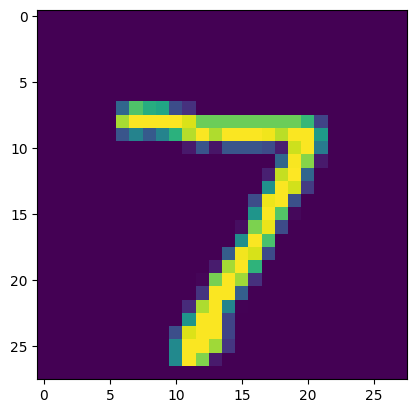

In [126]:
#NOW FOR FIRST DATA POINT OF X_test
plt.imshow(X_test[0])
plt.show()

In [127]:
print(Y_test[0])

7


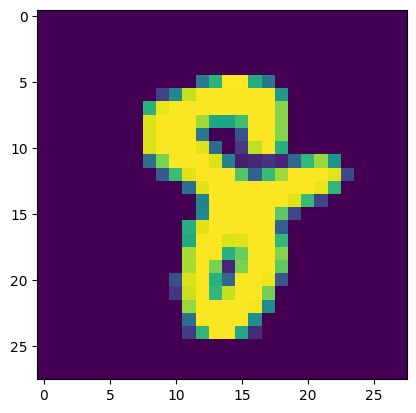

In [128]:
#NOW FOR ANY RANDOM NUMBER OF DATA POINT OF X_test
plt.imshow(X_test[277])
plt.show()

In [129]:
print(Y_test[277])

8


In [130]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [131]:
print(Y_pred.shape)

(10000, 10)


In [132]:
print(Y_pred[0])

[3.8084084e-12 7.2866434e-01 8.3955041e-05 3.5990405e-01 2.9628985e-08
 2.1199497e-05 5.7384824e-25 1.0000000e+00 8.0411115e-07 8.5248584e-01]


In [133]:
#CONVERTING THE PREDICTION PROBABLITIES TO CLASS LABEL FOR FIRST DATA POINT.
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [134]:
#NOW FOR ALL DATA POINTS
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 5, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

WHERE

Y_test = True labels

Y_pred_labels = Predicted Labels

**NOW CREATIN CONFUSION MATRIX**

In [135]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [136]:
print(conf_mat)

tf.Tensor(
[[ 945    1    4    3    1    2    4    5    2   13]
 [   0 1122    3    1    0    0    2    2    5    0]
 [   2    0 1003    8    4    0    2    7    5    1]
 [   0    1    4  987    1    2    0    5    1    9]
 [   1    1    7    0  961    0    5    3    1    3]
 [   1    0    0   35    1  843    2    0    5    5]
 [   4    2    0    1    7   12  927    0    5    0]
 [   0    0   11    4    2    0    0 1002    3    6]
 [   3    0    8   12    1    6    2    3  935    4]
 [   0    2    1    5   28    2    0    6    6  959]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Labels')

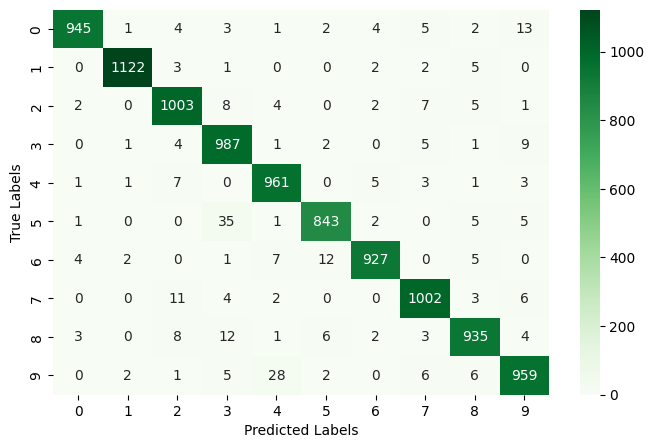

In [137]:
plt.figure(figsize=(8,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**NOW BUILDING A PREDICTIVE SYSTEM**

In [138]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [139]:
type(input_image)

numpy.ndarray

In [140]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


Image dimensions: (361, 594)


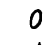

In [141]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# Load the image from the URL
url = 'https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png'
response = requests.get(url, stream=True).raw
input_image = np.asarray(bytearray(response.read()), dtype="uint8")
input_image = cv2.imdecode(input_image, cv2.IMREAD_GRAYSCALE)

# Check image dimensions
print(f"Image dimensions: {input_image.shape}")

# Crop a single digit (adjust coordinates based on the specific image layout)
# Example: Cropping the first digit (coordinates may vary)
single_digit = input_image[5:50, 5:50]  # Replace with the coordinates of the desired digit

# Display the single digit
cv2_imshow(single_digit)


In [142]:
input_image.shape

(361, 594)

In [143]:
grayscale = input_image  # The image is already in grayscale


In [144]:
grayscale.shape

(361, 594)

In [145]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [146]:
input_image_resize.shape

(28, 28)

In [147]:
cv2_imshow(input_image_resize)

In [148]:
input_image_resize = input_image_resize/255

In [149]:
type(input_image_resize)

numpy.ndarray

In [150]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [151]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[2.6880250e-13 2.3996851e-08 3.2410774e-01 4.3018866e-02 2.2588846e-26
  9.9999845e-01 2.0655115e-19 1.5868343e-10 6.1476588e-01 9.9055147e-01]]


In [152]:
input_pred_label = np.argmax(input_prediction)

In [153]:
print(input_pred_label)

5


**Predictive System**

In [154]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: /content/digit_sample.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The Handwritten Digit is recognised as  7
